# Abstract

El presente trabajo analiza un conjunto de 918 registros clínicos recopilados con el propósito de estudiar qué factores se asocian de manera más significativa con la presencia de enfermedad coronaria. El dataset, disponible en Kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download), contiene 11 variables predictoras que abarcan características demográficas como la edad y el sexo, así como diversas mediciones y parámetros cardiovasculares empleados habitualmente en la práctica clínica. Además, incluye una variable objetivo que indica si el paciente presenta o no la enfermedad. Este tipo de información resulta particularmente valiosa en contextos donde se requiere evaluar el riesgo de manera temprana y eficiente, utilizando datos simples, accesibles y de bajo costo.

El objetivo práctico de este proyecto es aportar información clara y fundamentada que pueda asistir a servicios de cardiología en la detección precoz de pacientes con probabilidad elevada de desarrollar o padecer enfermedad coronaria. En este tipo de problemas, la minimización de falsos negativos es esencial, ya que pasar por alto a un paciente enfermo puede tener consecuencias clínicas severas. Por lo tanto, comprender la estructura del dataset y las relaciones entre las variables constituye un paso inicial indispensable previo al desarrollo de modelos predictivos.

En esta primera etapa se lleva a cabo un análisis del dataset, con énfasis en tres tareas centrales: examinar la distribución de cada variable, identificar la presencia de valores perdidos o atípicos y estudiar, mediante visualizaciones univariadas, bivariadas y multivariadas, la relación entre los distintos factores de riesgo y la variable objetivo. Estas visualizaciones se complementan con estadísticas descriptivas que permiten una interpretación más precisa de los patrones observados, así como una mejor comprensión del comportamiento de cada variable en el contexto clínico.

Los resultados preliminares muestran tendencias alineadas con lo reportado en el campo de la medicina. Entre ellas se destacan una mayor prevalencia de enfermedad coronaria en pacientes de mayor edad, diferencias marcadas según el tipo de dolor de pecho reportado y una mayor probabilidad de padecer enfermedad en pacientes de sexo masculino. Asimismo, se observan patrones conjuntos en variables como la edad y la frecuencia cardíaca máxima alcanzada, que sugieren relaciones potencialmente valiosas para etapas posteriores del modelado.

Este estudio exploratorio sienta las bases para la siguiente fase del proyecto, en la cual se evaluarán diferentes algoritmos de clasificación y estrategias orientadas a optimizar la detección temprana de la enfermedad. El entendimiento profundo del comportamiento del dataset constituye un elemento clave para definir enfoques de modelado robustos y clínicamente relevantes.

# Preguntas de interés



*   ¿Cómo se distribuye la presencia de enfermedad coronaria según la edad?
*   ¿Existen diferencias en la prevalencia de enfermedad coronaria entre hombres y mujeres?
*  ¿Qué tipos de dolor de pecho (ChestPainType) se asocian con mayor probabilidad de enfermedad?
*  Considerando conjuntamente edad, MaxHR y enfermedad, ¿se observan patrones claros que permitan distinguir pacientes sanos de enfermos?


# Hipótesis.

1.   H1: La probabilidad de enfermedad coronaria aumenta con la edad.
2.   H2: El tipo de dolor de pecho “Typical Angina (TA)” y los pacientes asintomáticos (ASY) presentan una mayor proporción de enfermedad coronaria que otros tipos de dolor.
3. H3: Existirá una mayor proporción de enfermedad coronaria en hombres que en mujeres.
4. H4: En el plano Edad vs MaxHR, los pacientes con enfermedad presentarán, en promedio, menor frecuencia cardíaca máxima alcanzada para una misma edad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:

import pandas as pd
import numpy as np
df = pd.read_csv("heart.csv")
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Descripcion columnas

*   Age: Edad
*   Sex: Genero
*   ChestPainType: Tipo de dolor de pecho (TA: Angina Típica, ATA: Angina
Atípica, NAP: Dolor no proveniente de Angina, ASY: Asintomático)
*   RestingBP: Presion arterial en resposo
*   Cholesterol: sustancia grasa presente en el cuerpo con varios tipos, LDL , HDL  y VLDL
*   FastingBS: Medicion de azucar en sangre
*   RestingECG: Electro cardiograma
*   MaxHR: heart rate o ritmo cardiaco maximo
*   ExerciseAngina: Dolor producido por ejercicio
*   Oldpeak: depresión del segmento ST inducida por el ejercicio en relación con el reposo . pendiente del segmento ST en el ejercicio máximo
*   ST_Slope: pendientes que pueden inducir a una isquemia miocárdica o un signo de ataque cardíaco más grave
*   HeartDisease: Variable que informa si se dispone de enfermedad coronaria o no


In [3]:
df.info()
df.head()
df.describe()
df.describe(include="object")
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


np.int64(0)

El dataset contiene 918 filas y 12 columnas (partiendo desde la columna 0). No se observan valores nulos ni filas duplicadas. Existen 5 variables categóricas y 6 numéricas, además de la variable objetivo binaria "HeartDisease"

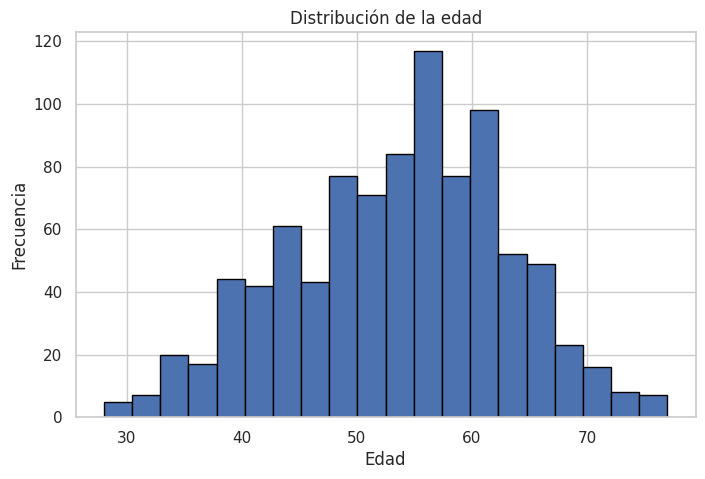

In [4]:
plt.hist(df["Age"], bins=20, edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la edad")
plt.show()


Como se ve en el grafico la mayoría de los pacientes se concentra en un rango de edades específico. Visualmente se observa una mayor frecuencia de personas entre aproximadamente 40 y 60 años.

Este comportamiento es consistente con lo esperado clínicamente, ya que la enfermedad coronaria suele aparecer con mayor frecuencia a partir de la mediana edad.

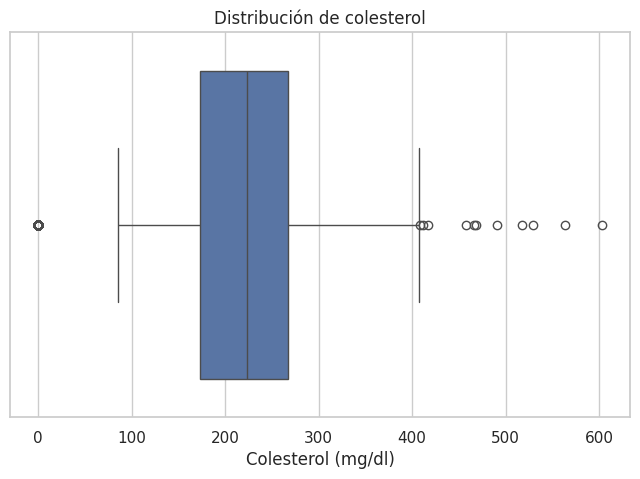

In [5]:
sns.boxplot(x=df["Cholesterol"])
plt.title("Distribución de colesterol")
plt.xlabel("Colesterol (mg/dl)")
plt.show()


*   El dataset tiene valores sospechosos.
*   No hay NaN, pero sí números que claramente no son fisiológicos.
*   Esos valores necesitan limpieza, imputación o filtrado en la etapa de preprocesamiento.
*   Este tipo de problemas afecta la calidad del modelo, porque distorsionan estadísticas y relaciones entre variables.

# H1

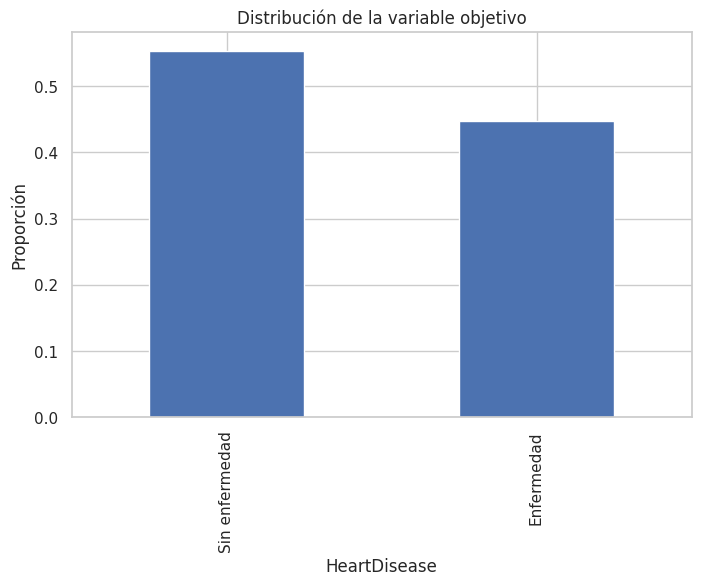

In [6]:
df["HeartDisease"].value_counts(normalize=True).plot(kind="bar")
plt.xticks([0,1], ["Sin enfermedad", "Enfermedad"])
plt.ylabel("Proporción")
plt.title("Distribución de la variable objetivo")
plt.show()

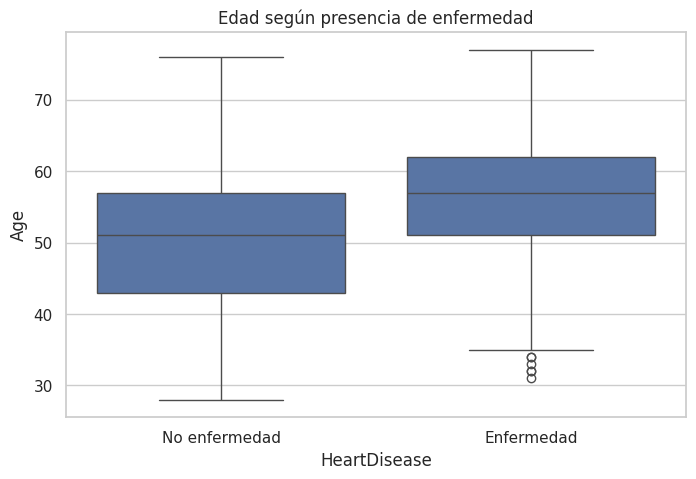

In [7]:
sns.boxplot(data=df, x="HeartDisease", y="Age")
plt.xticks([0,1], ["No enfermedad", "Enfermedad"])
plt.xlabel("HeartDisease")
plt.title("Edad según presencia de enfermedad")
plt.show()

Se observa que los pacientes con enfermedad coronaria presentan, en promedio, mayor edad que aquellos sin enfermedad, lo que apoya la hipótesis H1.

# H3

In [8]:
prop_sex_hd = (
    df.groupby("Sex")["HeartDisease"]
      .value_counts(normalize=True)
      .rename("proportion")
      .reset_index()
)

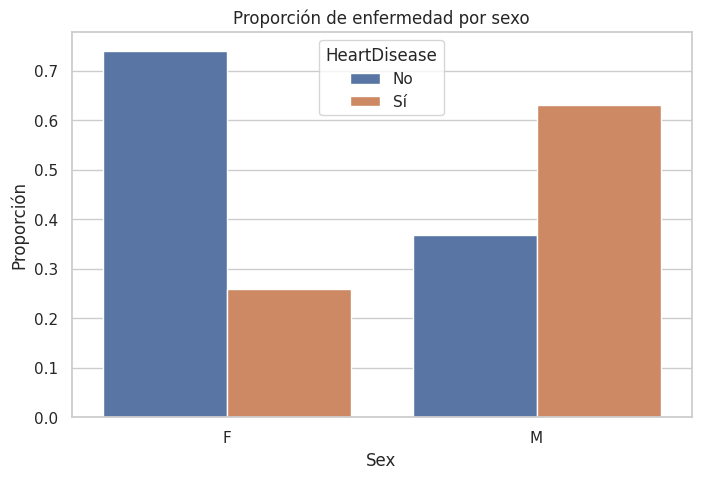

In [9]:
sns.barplot(data=prop_sex_hd, x="Sex", y="proportion", hue="HeartDisease")
plt.xlabel("Sex")
plt.ylabel("Proporción")
plt.title("Proporción de enfermedad por sexo")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No", "Sí"], title="HeartDisease")

plt.show()

En el dataset trabajado la enfermedad coronaria es más frecuente en hombres que en mujeres. El patrón coincide con lo observado, donde la prevalencia cardiovascular suele ser mayor en los hombres. Por lo tanto, estos resultados apoyan la H3 de que el sexo se relaciona con la presencia de enfermedad cardíaca y que los hombres presentan un riesgo más elevado en esta muestra.

# H2

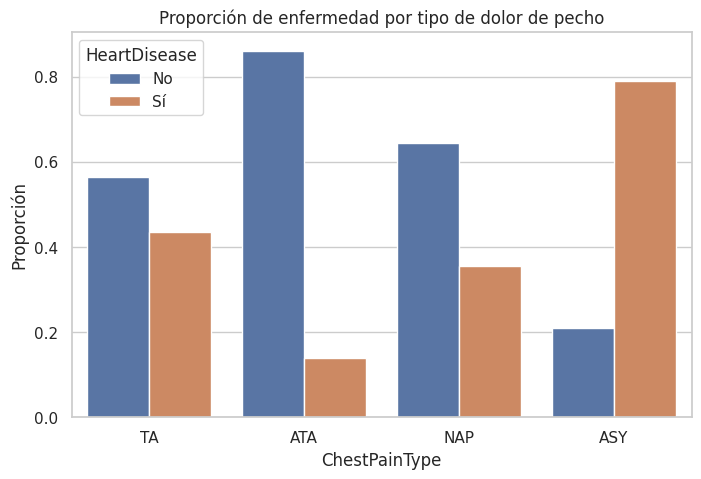

In [10]:
prop_cp_hd = (
    df.groupby("ChestPainType")["HeartDisease"]
      .value_counts(normalize=True)
      .rename("proportion")
      .reset_index()
)

orden = ["TA", "ATA", "NAP", "ASY"]
prop_cp_hd["ChestPainType"] = pd.Categorical(prop_cp_hd["ChestPainType"], categories=orden, ordered=True)

sns.barplot(data=prop_cp_hd, x="ChestPainType", y="proportion", hue="HeartDisease")
plt.ylabel("Proporción")
plt.title("Proporción de enfermedad por tipo de dolor de pecho")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No", "Sí"], title="HeartDisease")

plt.show()


El gráfico de proporciones confirma la H2. El grupo ASY presenta una proporción muy alta de enfermedad cardíaca, seguido por TA. En cambio, la angina típica (ATA) muestra la proporción más baja de casos positivos. Esto indica que el tipo de dolor de pecho es un predictor relevante y que ciertos perfiles, especialmente los asintomáticos, tienen un riesgo claramente mayor.

# H4

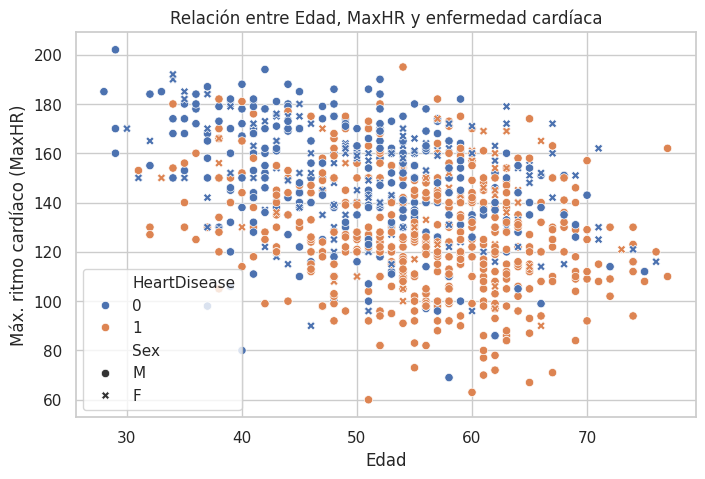

In [11]:
sns.scatterplot(
    data=df,
    x="Age",
    y="MaxHR",
    hue="HeartDisease",
    style="Sex"
)
plt.xlabel("Edad")
plt.ylabel("Máx. ritmo cardíaco (MaxHR)")
plt.title("Relación entre Edad, MaxHR y enfermedad cardíaca")
plt.show()


Se observa que los pacientes con enfermedad tienden a presentar menores valores de MaxHR para una misma edad en comparación con los pacientes sanos, lo cual es coherente con la hipótesis H4. Además, el patrón sugiere que este comportamiento se repite tanto en hombres como en mujeres.

# Valores Perdidos

Al utilizar el script de df.isnull().sum() no se observan valores nulos en ninguna de las columnas, pero si valores sospechosos como se muestra a continuacion:


In [12]:
df[df["Cholesterol"] == 0].head()
df[df["RestingBP"] == 0].head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Los valores de colesterol y presión arterial en reposo igual a 0, que no son fisiológicamente posibles. En el informe final estos casos se tratan redefiniendo dominios y/o imputando valores fuera de rango, por lo que se consideran como potencial problema de calidad de datos a abordar en etapas posteriores.

# Conclusiones parciales

El dataset contiene 918 registros y 12 variables clínicas, sin valores nulos ni filas duplicadas.

Se identifican posibles valores no realistas en variables numéricas como Cholesterol y RestingBP, que deberán tratarse en etapas posteriores.

El análisis univariado muestra que la enfermedad coronaria es más frecuente en edades avanzadas y se asocia a determinados tipos de dolor de pecho

Los gráficos bivariados y multivariados sugieren que Age y MaxHR están relacionados con la presencia de enfermedad, lo cual respalda las hipótesis planteadas y justifica su uso futuro en modelos de clasificación.


# Preparación de datos y modelado

>Las visualizaciones previas y el conocimiento clínico permitieron identificar variables potencialmente relevantes, como edad, sexo, tipo de dolor de pecho, MaxHR y Oldpeak, que luego fueron evaluadas automáticamente durante el proceso de selección de variables.



# Feature selection

> En función de los patrones observados durante el EDA y con el objetivo de reducir la dimensionalidad del dataset, se aplicó un método de selección automática de variables basado en información mutua (SelectKBest). Este enfoque permite conservar aquellas variables con mayor relación con la variable objetivo, evitando ruido innecesario en el modelo.



In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
from sklearn.impute import SimpleImputer

df_model = df.copy()
for col in ["Cholesterol", "RestingBP"]:
    df_model.loc[df_model[col] == 0, col] = np.nan

X = df_model.drop(columns="HeartDisease")
y = df_model["HeartDisease"]

In [15]:
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
num_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

In [16]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ]
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modelo

Dado que el problema consiste en predecir la presencia o ausencia de enfermedad cardíaca, se aborda como un problema de clasificación binaria. Se seleccionó la Regresión Logística como modelo base por su interpretabilidad y buen desempeño en problemas médicos.

In [18]:
clf = LogisticRegression(max_iter=2000, class_weight="balanced")

In [19]:
feature_selector = SelectKBest(
    score_func=mutual_info_classif,
    k=15
)

In [20]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("clf", clf)
])

model.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

# Métricas

Para evaluar el desempeño del modelo se utilizaron métricas clásicas de clasificación. Se puso especial énfasis en el recall de la clase positiva, ya que en este contexto es preferible minimizar falsos negativos.

In [21]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.875
Recall: 0.8725490196078431
Precision: 0.898989898989899
F1: 0.8855721393034826
ROC-AUC: 0.932209469153515

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.90      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



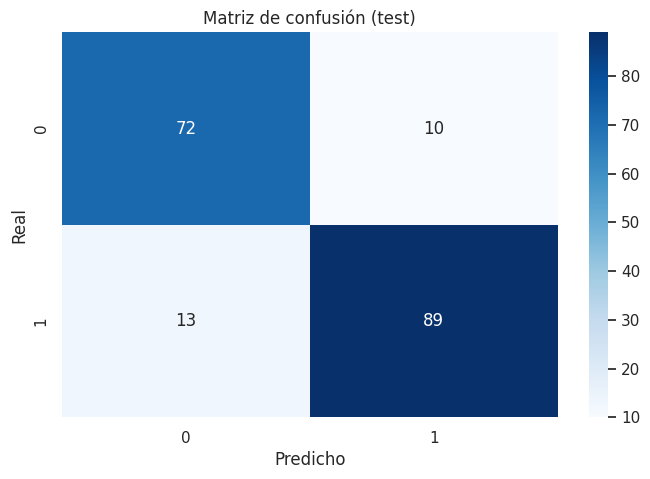

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión (test)")
plt.show()

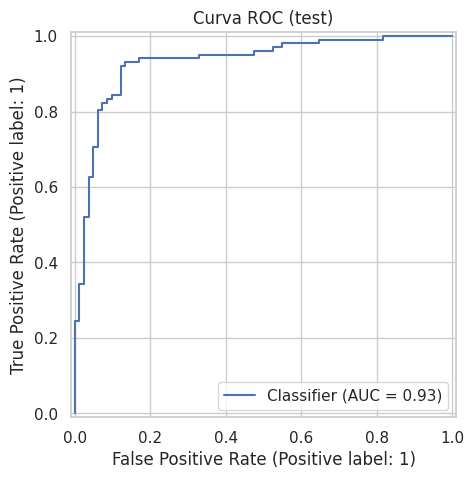

In [23]:
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Curva ROC (test)")
plt.show()

# Conclusiones Finales

Se entrenó un modelo de clasificación binaria para predecir HeartDisease a partir de variables clínicas de rutina, alineado con el objetivo de detección temprana. Siguiendo el criterio de negocio, se priorizó el recall para reducir falsos negativos, dado que omitir un paciente enfermo es más costoso que derivar a estudios adicionales.

Como reducción de dimensionalidad se aplicó SelectKBest (Mutual Information), seleccionando las variables transformadas más informativas luego del preprocesamiento. El modelo elegido fue una Regresión Logística con class_weight="balanced" para favorecer la detección de la clase positiva.

En el set de test, el modelo obtuvo métricas aceptables (accuracy, precision y especialmente recall), lo cual sugiere que el enfoque es viable como herramienta de apoyo al diagnóstico. No obstante, se observaron valores no realistas en variables numéricas (por ejemplo colesterol o presión en 0), por lo que el tratamiento de calidad de datos es un punto crítico para mejorar estabilidad y desempeño, tal como se remarca en el análisis exploratorio.

Como trabajo futuro, se recomienda comparar este baseline con modelos no lineales (por ejemplo Random Forest, como en el caso de referencia) y evaluar ajustes de umbral para maximizar recall sin degradar excesivamente la precisión.